## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t')
display(df)
df.info() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

**Вывод**<br>Можно увидеть что очень много float64 объектов, которые можно перевести в Int64


## Предобработка данных

In [3]:
# заменим пропущенные значения в столбце 'balcony' на 0
df['balcony'] = df['balcony'].fillna(0)

# дальше изменим тип столбеца first_day_exposition на datetime64
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# в столбеце 'is_apartment'(bool type) присутствуют значения 'nan', которые я заменю на False.
df['is_apartment'] = df['is_apartment'].fillna(False)

# переведу столбецы из типа float64 в int64
df['floors_total'] = df['floors_total'].astype('Int64')
df['airports_nearest'] = df['airports_nearest'].astype('Int64')
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('Int64')
df['balcony'] = df['balcony'].astype('Int64')
df['parks_around3000'] = df['parks_around3000'].astype('Int64')
df['ponds_around3000'] = df['ponds_around3000'].astype('Int64')
df['ponds_nearest'] = df['ponds_nearest'].astype('Int64')
df['parks_nearest'] = df['parks_nearest'].astype('Int64')
df['days_exposition'] = df['days_exposition'].round(0).astype('Int64')


# изменим столбец last_price - разделим на миллион, чтобы было удобнее считать.
df['last_price'] = ((df['last_price'] / 1000000).round(2)).astype('float64')

## Расчёты и добавление результатов в таблицу

In [4]:
# создадим функцию которая будет определять этаж
def apartment_floor_func(data):
    if data['floor'] == data['floors_total']:
        return 'Last'
    elif data['floor'] == 1:
        return 'First'
    else:
        return 'Other'

# посчитаем цену квадратного метра окуруглив до целых
df['price_per_square_meter'] = ((df['last_price'] / df['total_area']).round(0)).astype('Int64')

# добавим столбцы с годом / месяцем / днём недели
df['publication_year'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['publication_month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['publication_week_day'] = df['first_day_exposition'].dt.weekday_name

# создадим столбец с этажами квартир
df['apartment_floor'] = df.apply(apartment_floor_func, axis=1)

# создадим столбец который будет показывать соотношение жилой и общей площади
df['percent_of_living_area'] = (df['living_area'] / df['total_area']).round(2) 
# создадим столбец который будет показывать отношение площади кухни к общей площади
df['percent_of_kitchen'] = (df['kitchen_area'] / df['total_area']).round(2)


display(df.head())
df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,publication_year,publication_month,publication_week_day,apartment_floor,percent_of_living_area,percent_of_kitchen
0,20,13.00,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755,NaN,0,2019,3,Thursday,Other,0.47,0.23
1,7,3.35,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0,NaN,81,0,2018,12,Tuesday,First,0.46,0.27
2,10,5.20,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,2,574,558,0,2015,8,Thursday,Other,0.61,0.15
3,0,64.90,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,3,234,424,0,2015,7,Friday,Other,NaN,NaN
4,2,10.00,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48,121,0,2018,6,Tuesday,Other,0.32,0.41


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images              23699 non-null int64
last_price                23699 non-null float64
total_area                23699 non-null float64
first_day_exposition      23699 non-null datetime64[ns]
rooms                     23699 non-null int64
ceiling_height            14504 non-null float64
floors_total              23613 non-null Int64
living_area               21796 non-null float64
floor                     23699 non-null int64
is_apartment              23699 non-null bool
studio                    23699 non-null bool
open_plan                 23699 non-null bool
kitchen_area              21421 non-null float64
balcony                   23699 non-null Int64
locality_name             23650 non-null object
airports_nearest          18157 non-null Int64
cityCenters_nearest       18180 non-null Int64
parks_around3000          18181 non-null Int64
parks_nearest             80

## Исследовательский анализ данных

### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
Постройте гистограммы для каждого параметра.

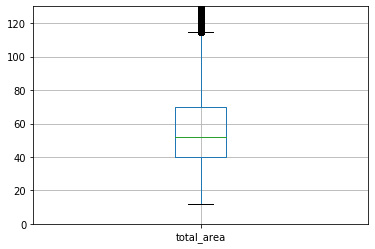

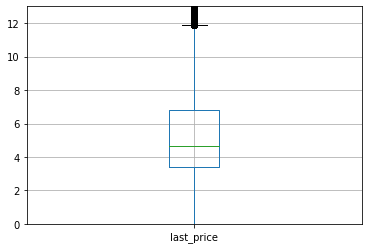

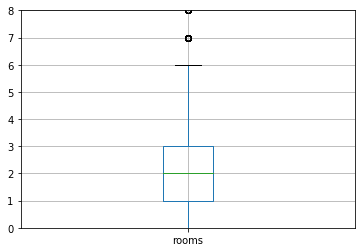

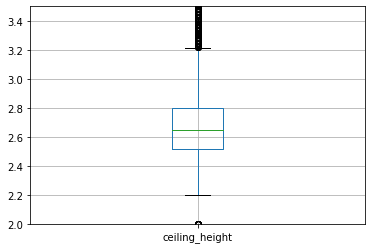

In [5]:
# строим боксплоты и ограничиваем до выбросов
df.boxplot(column='total_area')
plt.ylim(0, 130)
plt.show()

df.boxplot(column='last_price')
plt.ylim(0, 13)
plt.show()

df.boxplot(column='rooms')
plt.ylim(0, 8)
plt.show()

df.boxplot(column='ceiling_height')
plt.ylim(2, 3.5)
plt.show()

Теперь создаём гистограммы с ограничениями по выбросам.

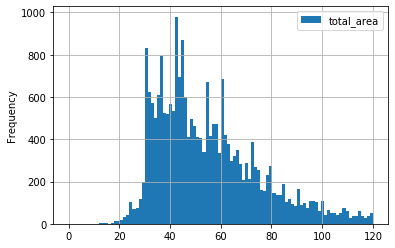

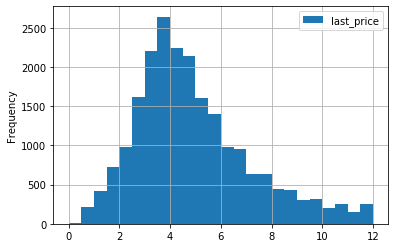

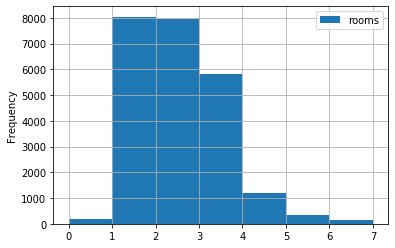

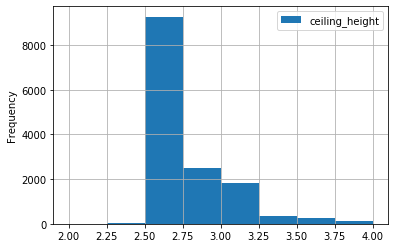

In [6]:
# 1
df.plot(kind='hist',
        y='total_area',
        bins=100,
        range=(0, 120),
        grid=True,
        label='total_area')


# 2
df.plot(kind='hist',
        y='last_price',
        bins=24,
        range=(0, 12),
        grid=True,
        label='last_price')


# 3
df.plot(kind='hist',
        y='rooms',
        bins=7,
        range=(0, 7),
        grid=True,
        linewidth = 0.5,
        label='rooms')


# 4
df.plot(kind='hist',
        y='ceiling_height',
        bins=8,
        range=(2, 4),
        grid=True,
        label='ceiling_height')

**Вывод:**

***Площадь*** Можно увидеть, что большинство продаваемых квартир имеют площадь от 25 до 75 кв.м. Самый пик популярности достигают квартиры с площадью от 26 до 48 кв.м.

***Цена:*** Большинство квартир продают от 2.5 до 5 млн.

***Число комнат:*** Основная масса продаж состоит из 1, 2 комнатных квартир. Почти одинаковые продажи. Чуть менее популярны трех комнатные квартиры. Четырёх комнатные квартиры кратно меньше продаются, чем 1, 2 комнатные. Студии и квартиры с пятью и более комнат имеют очень маленькие продажи.

***Высота потолков:*** Повальное большинство квартир имеет высоту потолков от 2.5 до 2.75 метров. Пик приходит на 2.5 метров. Реже встречаются квартиры с потолками от 2.75 до 3 метров, и еще реже квартиры с высотой 3 - 3.25. Квартиры с потолками больше 3.25 являются выбросами.

### Изучите время продажи квартиры. 
Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

(0, 600)

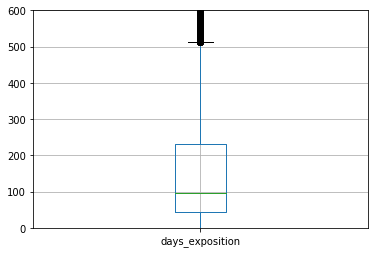

In [7]:
df.boxplot(column='days_exposition')
plt.ylim(0, 600)

Видим, что выбросы есть вплоть до 1600 дней, но основная масса продаж сосредоточена в диапазоне от 50 до ~230 дней. Выбросы начинаются с 500. Отсеим их.

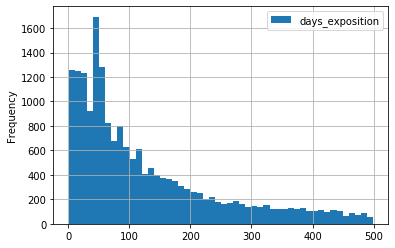

In [8]:
df1 = df.query('(days_exposition < 500)')
df1.plot(kind='hist',
        y='days_exposition',
        bins=50,
#         range=(0, 100),
        grid=True,
        label='days_exposition')


Можно увидеть, что большинство квартир продаются в период до 230 дней.

Выше в подзадаче "Изучите следующие параметры: площадь, цена, число комнат, высота потолков" я построил boxplot для параметров и в дальнейшем ограничил выбросы.

### Какие факторы больше всего влияют на стоимость квартиры? 
Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. 
Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
Также изучите зависимость от даты размещения: дня недели, месяца и года.

**Площадь**

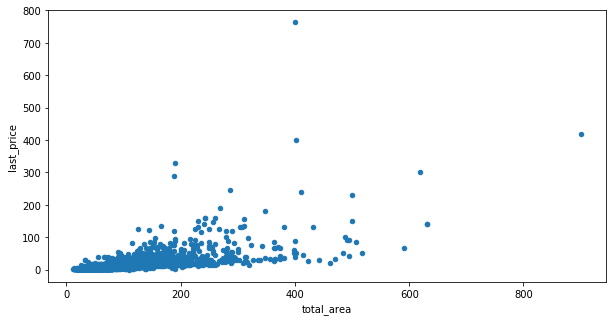

In [9]:
df.plot(x='total_area', y='last_price', kind='scatter', figsize = (10, 5)) #, alpha=0.01)

**Число комнат**

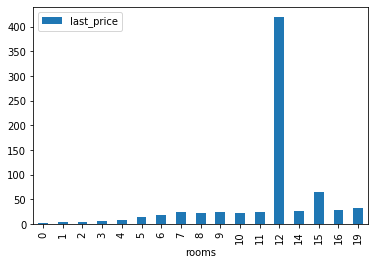

In [10]:
# создаем сводную таблицу и график по ней
rooms_price = df.pivot_table(index='rooms', values='last_price', aggfunc='median')
rooms_price.plot(y='last_price', kind='bar')

Квартиры с 12 комнатами выбиваются. Взглянем поближе:

In [11]:
df[df['rooms'] == 12]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,publication_year,publication_month,publication_week_day,apartment_floor,percent_of_living_area,percent_of_kitchen
19540,8,420.0,900.0,2017-12-06,12,2.8,25,409.7,25,False,...,2,318,106,0,2017,12,Wednesday,Last,0.46,0.12


Видим, что квартира одна. Можем смело ограничивать по цене.

(0, 70)

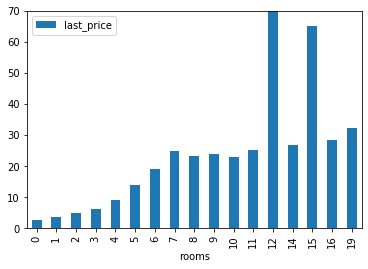

In [12]:
rooms_price.plot(y='last_price', kind='bar')
plt.ylim(0, 70)

Видим плавный рост цены до 7 комнатных квартир. Потом медианная цена варьируется в районе +- 20-40 млн.

**Удалённость от центра**

(0, 50)

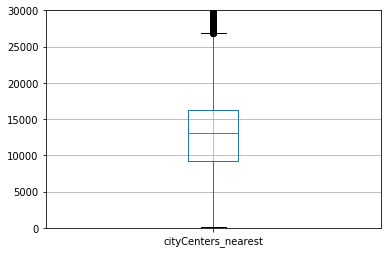

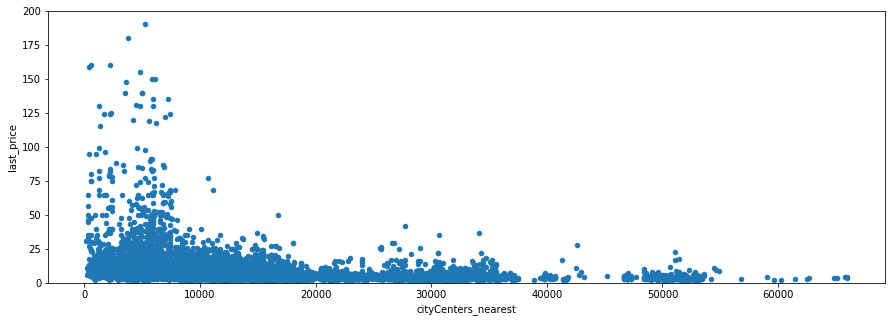

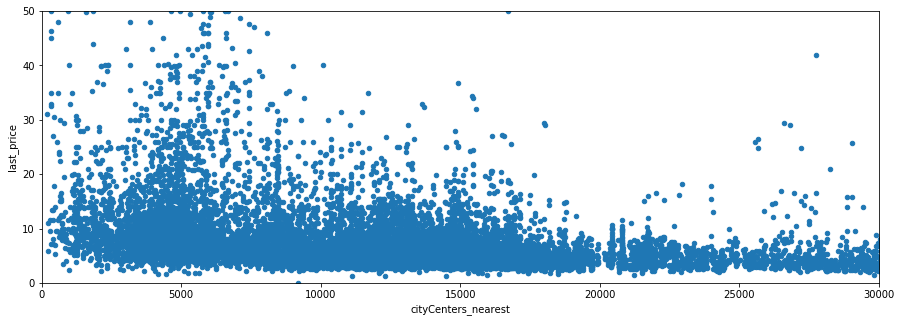

In [13]:
df.boxplot(column='cityCenters_nearest')
# убираем выбросы. это всё больше 26км
plt.ylim(0, 30000)

# общае представление о площади к цене (выбросы больше 200 я убрал)
df.plot(x='cityCenters_nearest', y='last_price', kind='scatter', figsize = (15, 5)) #, alpha=0.1)
plt.ylim(0, 200)

# теперь ограничимся 30км и стоимостью до 50 млн
df.plot(x='cityCenters_nearest', y='last_price', kind='scatter', figsize = (15, 5)) #, alpha=0.1)
plt.xlim(0, 30000)
plt.ylim(0, 50)

Мы видим, что большинство квартир не зависимо от расстояния до центра продаются за цену в диапазоне 10 млн. 

Но всё-таки можно заметить постепенный спад цены в зависимости от расстояния. Если средняя цена до 5 км сотавляет ~11-13 млн, то уже до 17 км она составляет 8-10 млн.

По "ящику с усами" можно увидеть, что большинство квартир покупают на расстоянии от 9 до 16 км от центра.

Среднее расстояние равняется 14.191 км от центра

**Этаж**

,last_price
apartment_floor,
First,3.90
Last,4.30
Other,4.85


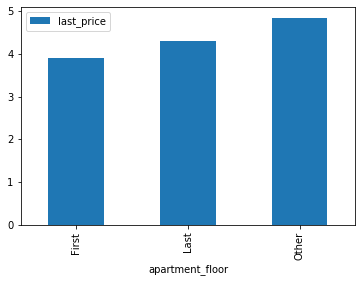

In [14]:
floors_price = df.pivot_table(index='apartment_floor', values='last_price', aggfunc='median')
display(floors_price)
floors_price.plot(y='last_price', kind='bar')

Мы видим, что квартиры на первом этаже являются самыми дешевыми. На втором месте по стоимости идут квартиры на последнем этаже. Они уже стоят чуть дороже. 

**Год, месяц, день недели**

,last_price
publication_year,
2014,7.70
2015,5.35
2016,4.55
2017,4.50
2018,4.55
2019,5.05


(0, 7)

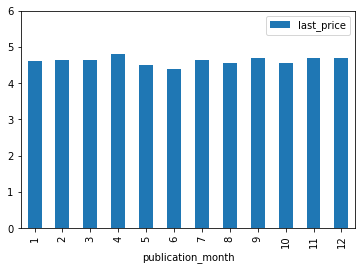

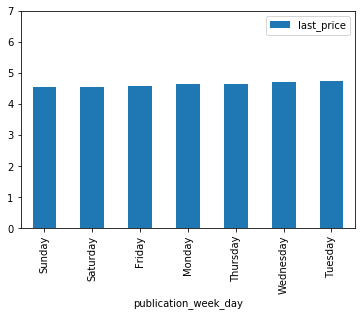

In [15]:
# год
year_price = df.pivot_table(index='publication_year', values='last_price', aggfunc='median')
display(year_price)

# месяц
month_price = df.pivot_table(index='publication_month', values='last_price', aggfunc='median')
month_price.plot(y='last_price', kind='bar')
plt.ylim(0, 6)

# день недели
week_day_price = df.pivot_table(index='publication_week_day', values='last_price', aggfunc='median').sort_values(by='last_price')
week_day_price.plot(y='last_price', kind='bar')
plt.ylim(0, 7)

**Год:** Можно пронаблюдать, что медиана цены была самой высокой в 2014 - примерно 7.5 млн. Она проседала до 4.5 млн в 2017, и сейчас стала расти - 5.05 млн.

**Месяц:** В апреле медиана стоимости самая высокая ~4.8 млн. А в июне самая низкая ~4.4 млн

**День недели:** В воскресенье совершаются самые недорогие сделки (медиана равна 4.55 млн), а во вторник самые дорогие (медиана равна 4.73 млн)

### Выберите 10 населённых пунктов с наибольшим числом объявлений. 
Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце *locality_name*.

In [16]:
top10 = df.pivot_table(index='locality_name', 
                       values='total_area', 
                       aggfunc=['count', 'mean', 'max', 'min'], 
                       margins=True).sort_values(('count', 'total_area'), ascending=False).head(11)
top10.columns = ['count', 'mean', 'max', 'min']
display(top10)

,count,mean,max,min
locality_name,,,,
All,23650,60.329069,900.0,12.0
Санкт-Петербург,15721,64.751488,900.0,12.0
посёлок Мурино,522,44.133448,98.1,20.0
посёлок Шушары,440,53.821273,128.0,17.0
Всеволожск,398,56.022186,152.0,20.0
Пушкин,369,61.552791,380.0,18.4
Колпино,338,53.231479,347.5,22.0
посёлок Парголово,327,51.521407,201.5,24.0
Гатчина,307,50.942932,147.8,26.0


### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра.
Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [17]:
# создаём таблицу и столбец с расстоянием в км 
df_spb = df[df['locality_name'] == 'Санкт-Петербург']
df_spb['cityCenters_nearest_km'] = (df_spb['cityCenters_nearest'] / 1000).round(0)

C:\Users\George\.conda\envs\praktikum_env_win_new\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


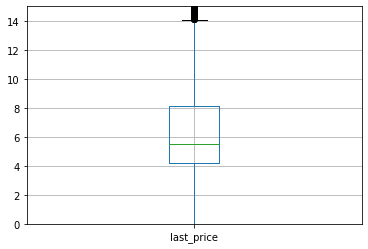

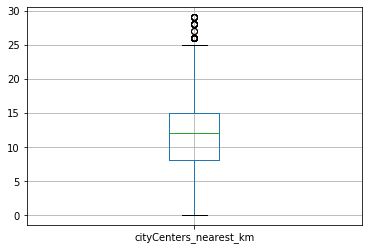

In [18]:
# строим боксплоты
df_spb.boxplot(column='last_price')
plt.ylim(0, 15)
plt.show()

df_spb.boxplot(column='cityCenters_nearest_km')
# plt.ylim(0, 16)
plt.show()


Итак. Будем считать, что центр питера находится в радиусе 8 км, тогда:

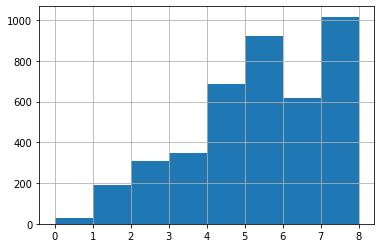

In [19]:
df_spb_center = df_spb[df_spb['cityCenters_nearest_km'] <= 8]
df_spb_center['cityCenters_nearest_km'].hist(bins=8)

### Выделите сегмент квартир в центре. 
Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

**Площадь:**
Сравним площади квартир только в центре и площади всех квартир в Питере.

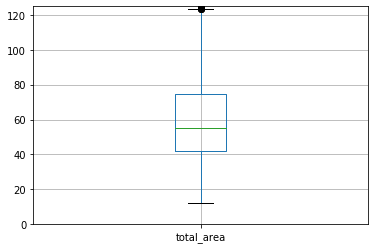

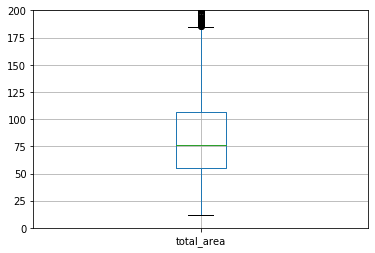

In [20]:
df_spb.boxplot(column='total_area')
plt.ylim(0, 125)
plt.show()


df_spb_center.boxplot(column='total_area')
plt.ylim(0, 200)
plt.show()

Мы видим, что медианная прощадь для квартир в центре состовляет 76 кв.м., в то время как для всех квартир в Питере - 55 кв.м. 

**Цена:** Сравним цены квартир только в центре и цены всех квартир в Питере.

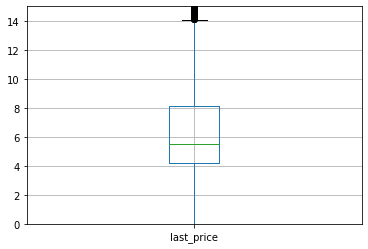

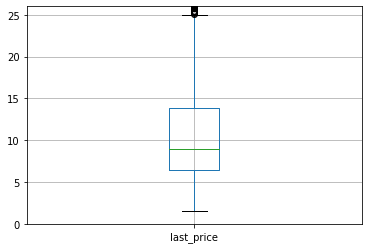

In [21]:
df_spb.boxplot(column='last_price')
plt.ylim(0, 15)
plt.show()


df_spb_center.boxplot(column='last_price')
plt.ylim(0, 26)
plt.show()

Мы видим, что медианная цена для квартир в центре состовляет почти 9 млн - 8.96 млн, в то время как для всех квартир в Питере - 5.5 млн. Также видим, что выбросы начинаются с 25 млн, а не с 14 млн как в случае со всеми квартирами.

**Число комнат:** Сравним число комнат квартир только в центре и число комнат всех квартир в Питере.

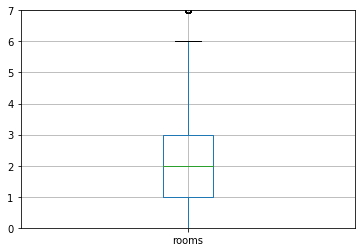

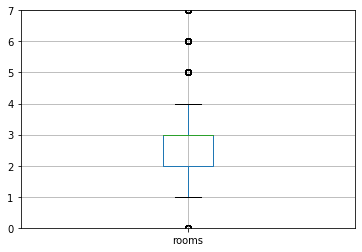

In [22]:
df_spb.boxplot(column='rooms')
plt.ylim(0, 7)
plt.show()

df_spb_center.boxplot(column='rooms')
plt.ylim(0, 7)
plt.show()

Мы видим, что медианное число комнат для квартир в центре состовляет 3, в то время как для всех квартир в Питере - 2. Но можно заметить, что выбросы начинаются с 4, а не с 6 как в случае со всеми квартирами.

**Высота потолков:** Сравним высоту потолков квартир только в центре и высоту потолков всех квартир в Питере.

In [23]:
print(df_spb['ceiling_height'].median())
print(df_spb_center['ceiling_height'].median())

2.7
3.0


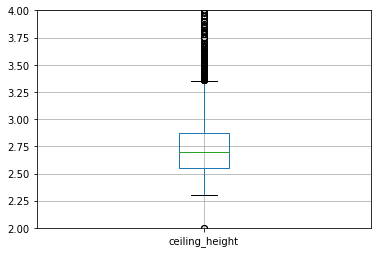

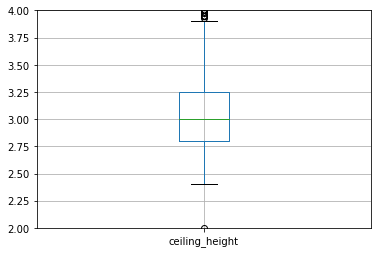

In [24]:
df_spb.boxplot(column='ceiling_height')
plt.ylim(2, 4)
plt.show()


df_spb_center.boxplot(column='ceiling_height')
plt.ylim(2, 4)
plt.show()

Мы видим, что медианная высота потолков для квартир в центре состовляет 3 метра, в то время как для всех квартир в Питере - 2.7 метров. Но можно заметить, что выбросы начинаются с 3.9 метров, а не с 3.3 метров как в случае со всеми квартирами.

**Теперь выделим факторы, которые влияют на стоимость квартиры**

**Число комнат**

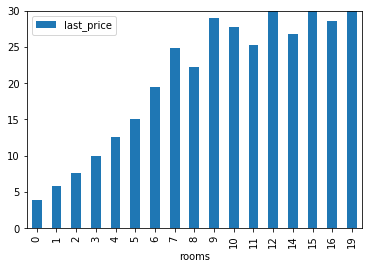

In [25]:
spb_center_floors_price = df_spb_center.pivot_table(index='rooms', values='last_price', aggfunc='median')
spb_center_floors_price.plot(y='last_price', kind='bar')
plt.ylim(0, 30)
plt.show()

Видим, что квартиры в центре с таким же количеством комнат стоят дороже по сравнению со всем квартирами Питера

**Этаж**

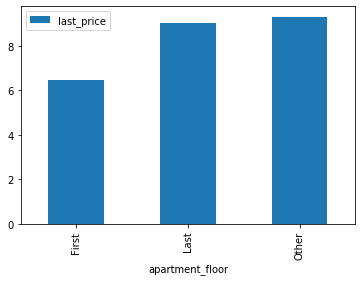

In [26]:
spb_center_floor = df_spb_center.pivot_table(index='apartment_floor', values='last_price', aggfunc='median')
spb_center_floor.plot(y='last_price', kind='bar')
plt.show()

Мы видим, что последних и других этажей сильно меньше, чем первых

**Удалённость от центра**

(1, 8)

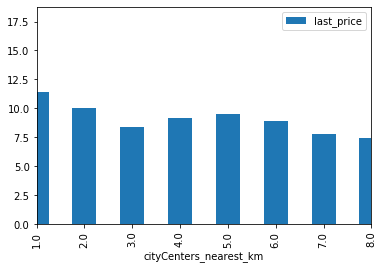

In [27]:
spb_center_city_сenters_nearest_km = df_spb_center.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median') #.sort_values(by='last_price')
    
spb_center_city_сenters_nearest_km.plot(y='last_price', kind='bar')
plt.xlim(1, 8)

Видим, что цена в среднем колеблется от 7.5 млн до 10 млн, если не брать в учет квартиру в 1 км от центра.

**Дата размещения объявления**

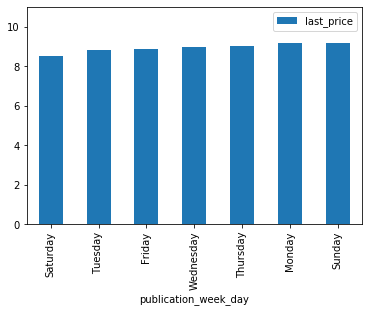

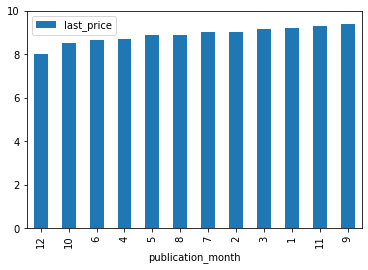

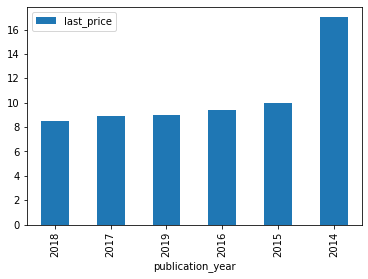

In [28]:
# дни недели
spb_center_floor = df_spb_center.pivot_table(index='publication_week_day', values='last_price', aggfunc='median').sort_values(by='last_price')
spb_center_floor.plot(y='last_price', kind='bar')
plt.ylim(0, 11)

# месяц
spb_center_floor = df_spb_center.pivot_table(index='publication_month', values='last_price', aggfunc='median').sort_values(by='last_price')
spb_center_floor.plot(y='last_price', kind='bar')
plt.ylim(0, 10)

# год
spb_center_floor = df_spb_center.pivot_table(index='publication_year', values='last_price', aggfunc='median').sort_values(by='last_price')
spb_center_floor.plot(y='last_price', kind='bar')

Опираясь на эту сводку можно сделать вывод, что чаще всего квартиры в центре питера покупали в воскресенье, в сентябре и в 2014 году.

## Общий вывод

**Итак подводим итоги исследования**

Мы узнали среднее время продажи квартиры. Оно составляет примерно 230 дней.

Изучили факторы которые влияют на стоимость квартиры.

Выбрали 10 населённых пунктов с наибольшим числом объявлений.